In [1]:
# Load the needed libraries
import numpy as np
import pandas as pd

In [2]:
# Turn off all warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [3]:
# Load the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read csv file into pandas DataFrame
gold_df = pd.read_csv('gold_price_data.csv')

In [5]:
# Shape of the data
print('Number of rows: ',gold_df.shape[0])
print('Number of columns: ',gold_df.shape[1])

Number of rows:  2290
Number of columns:  6


In [6]:
# Head and Tail of the data
gold_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
# Info of the data
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Statistical measures(describe) of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# get the columns(features) of the data
gold_df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [10]:
# Checking for missing values in the data
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Exploratory Data Analysis

In [11]:
# Setting up for visualization
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

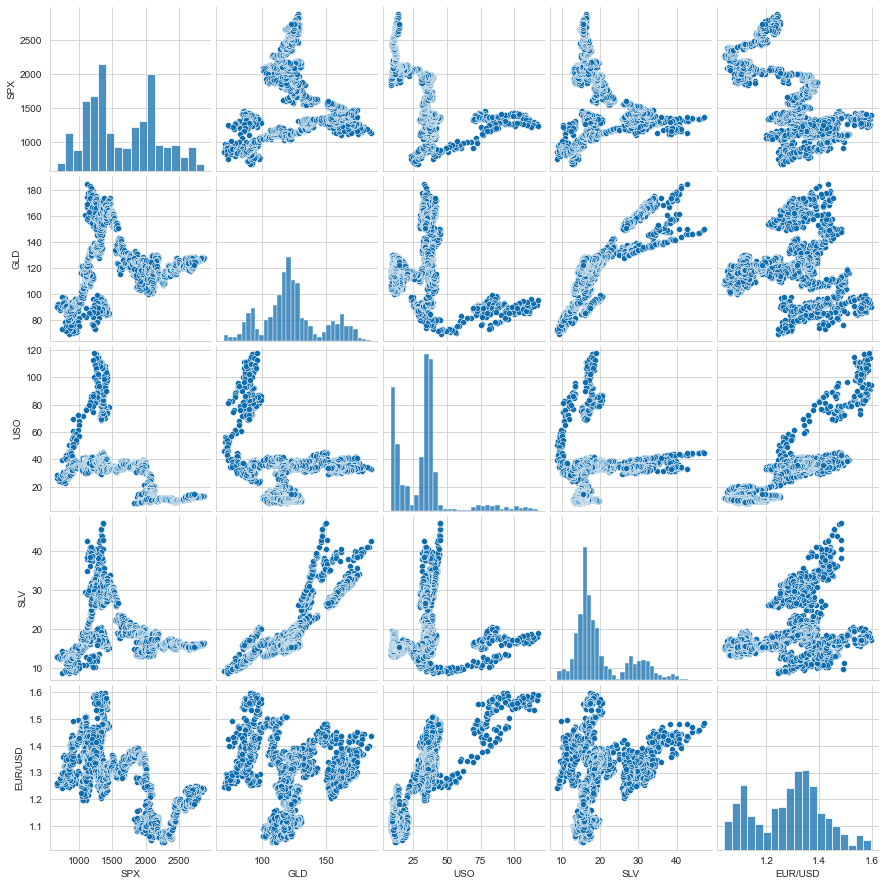

In [12]:
# Pairplot of the data
sns.pairplot(gold_df)

<AxesSubplot:>

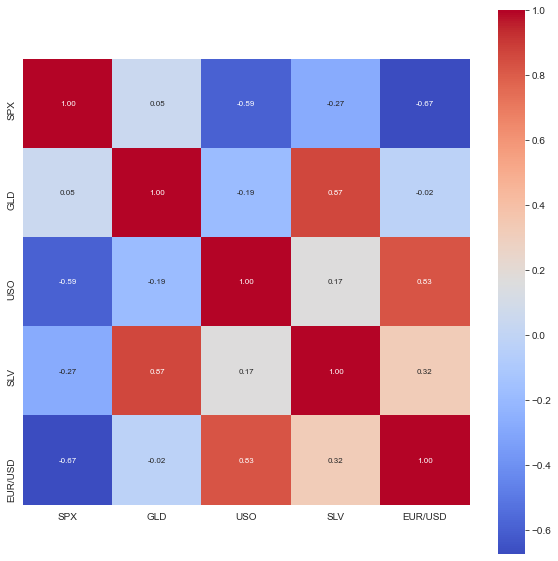

In [13]:
# Heatmap of the data
plt.figure(figsize=(10,10))
sns.heatmap(gold_df.corr(), annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f', annot_kws={'size':8})

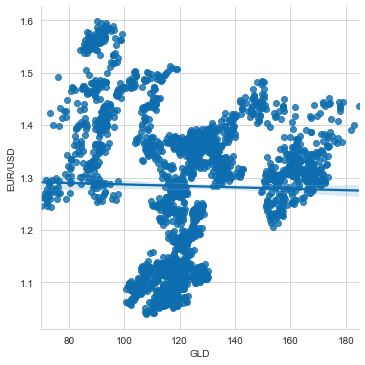

In [14]:
# LmPlot of the data
sns.lmplot(x='GLD', y='EUR/USD', data=gold_df)

In [15]:
# Splitting the features into X and y
X = gold_df.drop(['Date', 'GLD'], axis=1)
y = gold_df['GLD']

In [16]:
# Splitting into Training Data and Test Data using Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [17]:
# Create and Train Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
# Prediction on Test Data
prediction = model.predict(X_test)

Text(0.5, 1.0, 'Y Test vs Predicted Y')

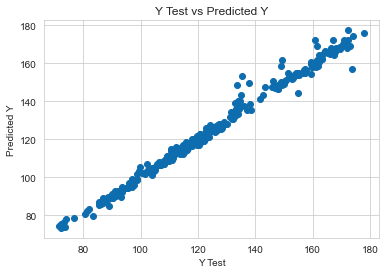

In [19]:
# Scatterplot of y_test and prediction
plt.scatter(y_test, prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Y Test vs Predicted Y')

In [21]:
# Evaluating with regression metrics libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# Mean Absolute Error
print('MAE: ',mean_absolute_error(y_test, prediction))

# Mean Squared Error
print('MSE: ',mean_squared_error(y_test, prediction))

# Root Mean Squared Error
print('RMSE: ',np.sqrt(mean_squared_error(y_test, prediction)))
print('\n')

# R Squared Error
print('R Squared Error: ',r2_score(y_test, prediction))
print('\n')

# Explained Variance Score
print('Variance Score: ',explained_variance_score(y_test, prediction))

MAE:  1.3384828134497826
MSE:  5.803240859878727
RMSE:  2.4089916687026394


R Squared Error:  0.9889974170642212


Variance Score:  0.9890978150493258
